# 二維離散小波轉換 (2D Discrete Wavelet Transform)
## 簡介
小波轉換 (Wavelete transform)與傅立葉轉換 (Fourier transform)類似，是一種信號分析的方法，特色是是同時具有空間解析度 (spatial resolution)與頻率解析度 (frequency resolution)，其中二維小波轉換 (2D Discrete Wavelet Transform)經常被用於影像分析。

## 實作
一層2D小波轉換的實作流程圖如下，先對rows做分解再對columns做分解，最後會分解成四種成分，解析度變成前一層的1/2
![dwt2](https://rvtd4a.bn.files.1drv.com/y4mHusYAwBECdqd0llmBb5HjmlQ2ScqEY_SgozZU7O_UTjCIQIyk336FC9177QTB8cN-UE6kd6mHU2L6MfZvKzP6KocZ_O2FKs5UZsvuq3kJtZK0hUI8djG9ST6XmR-EPoR5YohEgU36U8m_uZcL-RtA8HNj8cJJC1FFuWiHfT74zBGPOqI_9H21aERfGgMNBB__NH7x5tHK0VaoMgUUgo-NQ?width=660&height=405&cropmode=none)

$cA_i$:approximation coefficients at level $i$

$cH_{i}$:horizontal coefficients at level $i$

$cV_{i}$:vertical coefficients at level $i$

$cD_{i}$:diagonal coefficients at level $i$

初始$cA_0$為原始影像。

## 範例
PyWavelets是一個Python的小波函式庫，可以實現多維小波轉換，其中影像的一階離散小波轉換的範例如下：

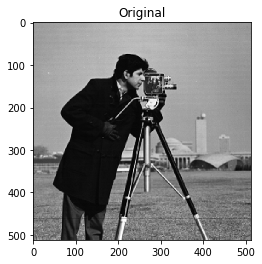

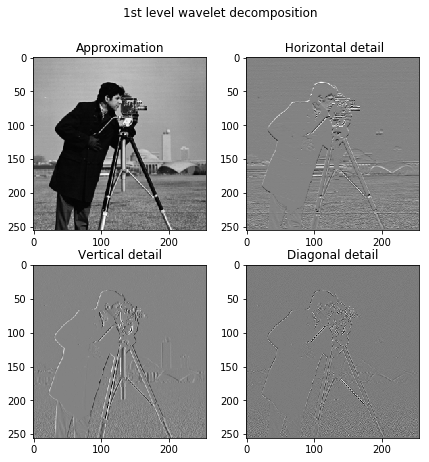

In [2]:
%matplotlib inline
import pywt as pt
import scipy as sp
import matplotlib.pyplot as plt

# Load image
img = pt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']

cA, (cH, cV, cD) = pt.dwt2(img, 'db1')
'''
pywt.dwt2 return structure
                            -------------------
                            |        |        |
                            | cA(LL) | cH(LH) |
                            |        |        |
(cA, (cH, cV, cD))  <--->   -------------------
                            |        |        |
                            | cV(HL) | cD(HH) |
                            |        |        |
                            -------------------
'''
plt.figure()
plt.title('Original')
plt.imshow(img, 'gray')

fig, ax = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle('1st level wavelet decomposition')
ax[0,0].set_title(titles[0])
ax[0,0].imshow(cA, 'gray')
ax[0,1].set_title(titles[1])
ax[0,1].imshow(cH, 'gray')
ax[1,0].set_title(titles[2])
ax[1,0].imshow(cV, 'gray')
ax[1,1].set_title(titles[3])
ax[1,1].imshow(cD, 'gray')
plt.show()

## 參考
[Mathwork](https://www.mathworks.com/help/wavelet/ref/dwt2.html)

[PyWavelets](https://pywavelets.readthedocs.io/en/latest/#main-features)